<center>
    <h1>INF-477. Redes Neuronales Artificiales.</h1>
    <h2>Tarea 1 - Perceptrones Multicapa ó Redes FF</h2>
    <hr>
    <h3>Juan Carlos Garcés Bernt</h3>
    <h5>jcgarces@alumnos.inf.utfsm.cl</h5>
<center>

# 1 El XOR
<img width="20%" src="./img/deseado-XOR.jpg">
<center>Fig. 1: Distribución deseada para la actividad 1. Los 2 colores representan 2 clases distintas.</center>

1. Escriba una función que genere (aleatoriamente) $n$ datos etiquetados de la forma $\{(x_{1}, y_{1}),...,(x_{n}, y_{n})\}$,
$x_{i} \in \mathbb{R}^{2}, y_{i} \in \{0, 1\}$, con una distribución de probabilidad que refleje la configuración linealmente inseparable que muestra la $Fig.1$. Utilice esta función para generar un conjunto de $1000$ datos de entrenamiento y $1000$ datos de pruebas. El problema de clasificación obtenido se denomina en ocasiones
"XOR". ¿Porqué?

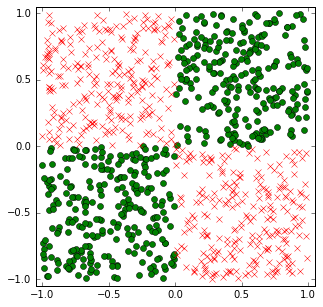

In [27]:
# cvalle@inf.utfsm.cl
from ipywidgets import *
from numpy.random import uniform
import numpy as np
import matplotlib.pyplot as plt

n=1000
x_train = uniform(low=-1.0,high=1.0,size=(n,2))
x_test = uniform(low=-1.0,high=1.0,size=(n,2))

y_train=[]
y_test=[]
c1x=[]
c1y=[]
c2x=[]
c2y=[]

# Tag TRAIN
# shape[0] cantidad de filas
for i in range(x_train.shape[0]):
    if x_train[i,0]>0 and x_train[i,1]>0:
        y_train.append(1)
        c1x.append(x_train[i,0])
        c1y.append(x_train[i,1])

    else: 
        if x_train[i,0]<0 and x_train[i,1]<0:
            y_train.append(1)
            c1x.append(x_train[i,0])
            c1y.append(x_train[i,1])
        else:
            y_train.append(0)
            c2x.append(x_train[i,0])
            c2y.append(x_train[i,1])


for i in range(x_test.shape[0]):
    if x_test[i,0]>0 and x_test[i,1]>0:
        y_test.append(1)

    else: 
        if x_test[i,0]<0 and x_test[i,1]<0:
            y_test.append(1)
        else:
            y_test.append(0)

plt.figure(figsize=(5,5))
plt.plot(c1x, c1y, 'go',label="Clase 1")
plt.plot(c2x, c2y, 'rx', label="Clase 2")
#plt.axhline(0, color='k')
#plt.axvline(0, color='k')
#plt.legend(loc='center right')
plt.axis([-1.05, 1.05, -1.05, 1.05])
plt.show()

2. Demuestre experimentalmente que una neurona artificial individual no puede resolver satisfactoriamente el problema anterior. Puede utilizar la funcion de activación y el método de entrenamiento que prefiera. Sea convincente. Describa y explique lo que observa.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(1, input_dim=1000))
model.add(Activation('relu'))


3. Demuestre experimentalmente que un perceptron multicapas puede resolver satisfactoriamente el problema obtenido en (a). Puede utilizar la arquitectura y el método de entrenamiento que prefiera. Sea convincente. Describa y explique lo que observa.

In [28]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

model = Sequential() # nuevo modelo tipo sequential (definida por capas)

model.add(Dense(15, input_dim=2, init="uniform"))
model.add(Activation("relu")) # a la capa escondida
model.add(Dense(1, init="uniform")) #output
model.add(Activation("linear")) # lineal       softmax

sgd = SGD(lr=0.8)

# funcion de pérdida: 0.1, eqm,    problema de clasificación o regresión mean_squared_error binary_crossentropy
model.compile(optimizer=sgd,loss="mean_squared_error")#, metrics=["accuracy"])

# model.fit -> entrenar
hist = model.fit(x_train,
                 y_train, 
                 nb_epoch=300,
                 verbose=0)
error_test = model.evaluate(x_test,y_test)
error_train = model.evaluate(x_train,y_train)
print("\nTest:",error_test)
print("Train: ",error_train)

  32/1000 [..............................] - ETA: 0s
Test: 0.222710852623
Train:  0.226260895252


<hr><hr><hr>
# 2 Predicción de Precio de una Casa
En esta sección trabajaremos con un pequeño dataset conocido como *Boston Housing* que nos permitirá
experimentar de modo más completo y exhaustivo con las técnicas bajo estudio. El problema consiste en
predecir el precio de una casa en una zona/barrio de Boston (USA) a partir de una serie de atributos que
describen el lugar que éste se ubica: tasa de criminalidad, proporción de zona residencial, proporción de zona
industrial, si se encuentra junto al río ó no, contaminación atmosférica medida como la concentración de
óxidos nítricos en el aire, etc. Para ver en detalle la descripción de la semántica asociada a los atributos de
este problema, puede consultar https://archive.ics.uci.edu/ml/datasets/Housing.
<img width="70%" src="./img/houses.jpg">

### (a) Construya un dataframe con los datos a analizar descargando los datos desde la URL mantenida por los autores de . Explique qué hacen las líneas $4$ a $7$

In [32]:
import pandas as pd
url = "http://mldata.org/repository/data/download/csv/regression-datasets-housing/"

df = pd.read_csv(url, sep=",",header=None, names=["CRIM","ZN","INDUS","CHAS","NOX",
        "RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"])
from sklearn.cross_validation import train_test_split
df_train, df_test = train_test_split(df, test_size=0.25, random_state=0)

En la línea 4 y 5 se crea una variable df (dataframe) que hace lectura de un documento separado por comas (.CSV) ignorando la cabecera (header) y todas las columnas correspondientes a la lista "names", las siglas se pueden ver a continuación
Attribute Information:

1. **CRIM**: per capita crime rate by town 
2. **ZN**: proportion of residential land zoned for lots over 25,000 sq.ft. 
3. **INDUS**: proportion of non-retail business acres per town 
4. **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
5. **NOX**: nitric oxides concentration (parts per 10 million) 
6. **RM**: average number of rooms per dwelling 
7. **AGE**: proportion of owner-occupied units built prior to 1940 
8. **DIS**: weighted distances to five Boston employment centres 
9. **RAD**: index of accessibility to radial highways 
10. **TAX**: full-value property-tax rate per \$10,000 
11. **PTRATIO**: pupil-teacher ratio by town 
12. **B**: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
13. **LSTAT**: % lower status of the population 
14. **MEDV**: Median value of owner-occupied homes in \$1000's

En la línea 6 se importa la función *train_test_split* de la librería de *sklearn.cross_validation*, esta función toma como input un dataframe y por medio de parámetros puede manejar dicha información retornando dos dataframes (entrenamiento y pruebas) , en este caso se está utilizando el parámetro: 

En la línea 7 se deinen dos variables *df_train* y *df_test* que serán los 2 nuevos dataframes obtenidos por la división del original (df) al utilizar la función recien importada *train_test_split*, esta función recibe tres parámetros de entrada:

*df*: Datafrase obtenido desde el archivo .CSV

*test_size* : Corresponde a un valor entre 0 y 1 que representa la porporción del dataset que incluirá en la separación del dataset. 

*random_state* : Numero generador para un muestreo aleatorio.

## (b) Describa brevemente el dataset a utilizar
```python
df.shape
df.info()
df.describe()
```

Función para describir el dataset

In [ ]:
def DescribeDataSet(df):
    r,c = df.shape
    print("Dataframe de {} filas y {} columnas\n\n".format(r,c))

    print("Resumen del dataframe:")
    df.info()
    print("\n\n")

    print("Dataframe (sin datos nulos):")
    print(df.describe())

### dataframe : df_train

In [ ]:
DescribeDataSet(df_train)

### dataframe : df_test

In [ ]:
DescribeDataSet(df_test)

## (c) Normalice los datos antes de trabajar. explique la importancia/conveniencia de realizar esta operación.

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df_train)
X_train_scaled = pd.DataFrame(scaler.transform(df_train),columns=df_train.columns)
y_train = X_train_scaled.pop("MEDV")

X_test_scaled = pd.DataFrame(scaler.transform(df_test),columns=df_test.columns)
y_test = X_test_scaled.pop("MEDV")
#y_test = df_test["MEDV"]

## (d) Muestre en un gráfico el error cuadrático (MSE) vs número de *epochs* de entrenamiento, para una red *feedforward* de $3$ capas, con $200$ unidades ocultas y función de activación *sigmoidal*. Entrene la red usando gradiente descendente estocástico con *learning rate* $0.2$ y $300$ epochs de entrenamiento, en el conjunto de entrenamiento y de test. Comente.

In [21]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

def plotMseVsEpoch(h_layer,activation,learning_rate,epoch):
    model = Sequential()
    model.add(Dense(h_layer, input_dim=X_train_scaled.shape[1], init="uniform"))
    model.add(Activation(activation))
    model.add(Dense(1, init="uniform"))
    model.add(Activation("linear"))

    sgd = SGD(lr=learning_rate)
    model.compile(optimizer=sgd,loss="mean_squared_error")

    hist = model.fit(X_train_scaled.as_matrix(), y_train.as_matrix(), 
                     nb_epoch=epoch, 
                     verbose=0, 
                     validation_data=(X_test_scaled.as_matrix(), 
                                      y_test.as_matrix()
                                     )
                    )

    plt.plot(hist.epoch,hist.history['loss'],'-r',label=activation)
    
    plt.figure(figsize=(20,5))
    plt.legend(loc='upper right')
    plt.suptitle('Epoch VS MSE ',fontsize=22)
    plt.ylabel('MSE',fontsize=20)
    plt.xlabel('Epoch',fontsize=20)
    plt.grid()
    plt.show()

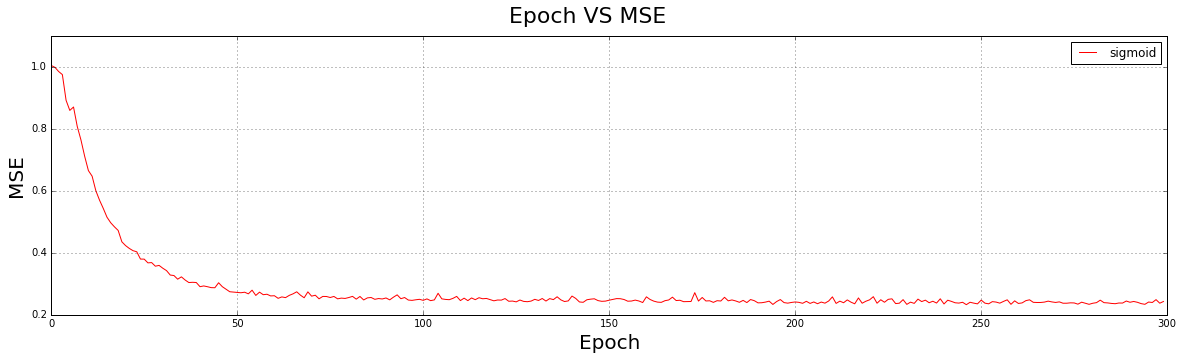

In [22]:
plotMseVsEpoch(200,"sigmoid",0.01,300)

## (e) Repita el paso anterior, utilizado 'Relu' como función de activación y compare con lo obtenido en d).

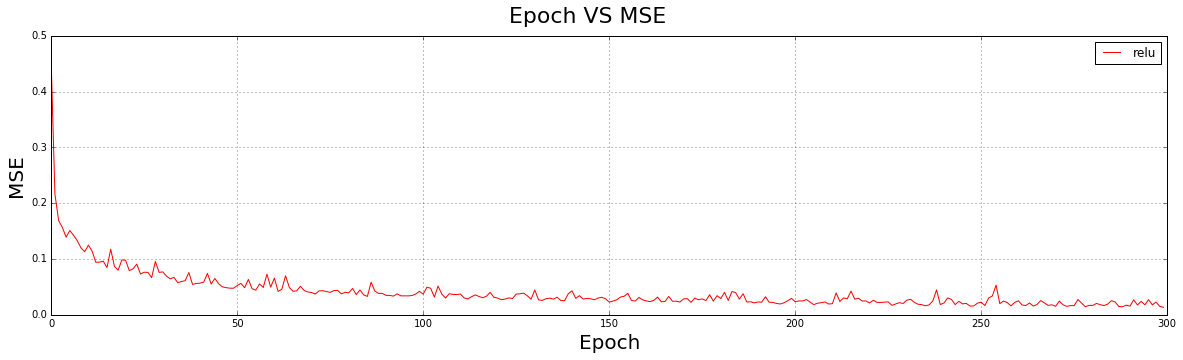

In [23]:
plotMseVsEpoch(200,"relu",0.2,300)

## (f) Repita d) variando el learning rate. Comente.

In [25]:
import numpy as np
from matplotlib import pyplot as plt

n_lr = 20
lear_rate = np.linspace(0,1,n_lr)
print(lear_rate)

[ 0.          0.05263158  0.10526316  0.15789474  0.21052632  0.26315789
  0.31578947  0.36842105  0.42105263  0.47368421  0.52631579  0.57894737
  0.63157895  0.68421053  0.73684211  0.78947368  0.84210526  0.89473684
  0.94736842  1.        ]


## (g) Estime el error de predicción de los modelos d) y e) usando validación cruzada con un número de folds igual a $K = 5$ y $K = 10$. Recuerde que para que la estimación sea razonable debe ajustar los pesos del modelo de nuevo, cada vez que trabaja sobre un determinado fold. Mida el error real del modelo sobre el conjunto de pruebas, compare y concluya.

In [35]:
from sklearn import cross_validation

Xm = X_train_scaled.as_matrix()
ym = y_train.as_matrix()
kfold = cross_validation.KFold(len(Xm), 10)
cvscores = []
for i, (train, val) in enumerate(kfold):
    # create model
    model = Sequential()
    model.add(Dense(200, input_dim=Xm.shape[1], init="uniform"))
    model.add(Activation("relu"))
    model.add(Dense(1, init="uniform"))
    model.add(Activation("linear"))
    # Compile model
    sgd = SGD(lr=0.2)
    model.compile(optimizer=sgd,loss="mean_squared_error")
    # Fit the model
    model.fit(Xm[train], ym[train], nb_epoch=300,verbose=0 )
    # evaluate the model
    scores = model.evaluate(Xm[val], ym[val])
    cvscores.append(scores)

mse_cv = np.mean(cvscores)

32/37 [========================>.....] - ETA: 0s

In [37]:
print(cvscores)

[0.071101809214604531, 0.11435207489289735, 0.22519735913527639, 0.13784050470904299, 0.12048015155290302, 0.16270225495100021, 0.16468489993559687, 0.071287882171179123, 0.058145955008895772, 0.03666973194560489]


## (h) Entrene el modelo obtenido en d) usando *progressive decay* Compare y comente.

In [ ]:
n_decay = 10
lear_decay = np.logspace(-6,0,n_decay)
sgd = SGD(lr=0.2, decay=1e-6)

## (i) Entrene el modelo obtenido en d) usando momentum

In [ ]:
n_decay = 21
momentum = np.linspace(0,1,n_decay)
sgd = SGD(lr=0.2,momentum=0.9)

## (j) Entrene los modelos obtenidos en d) y e) cambiando el tamaño del batch. Compare SGD, batch y mini-batch.

In [ ]:
n_batches = 21
batch_sizes = np.round(np.linspace(1,X_train_scaled.shape[0],n_batches))
model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), batch_size=50, nb_epoch=300)

<hr><hr><hr>
<img width="30%" src="./img/CIFAR10.jpg">
# 3 Reconocimiento de Imágenes en CIFAR10
En esta sección trabajaremos con un dataset bastante conocido y utilizado por la comunidad para experimentar
con reconocimiento de objetos en imágenes: **CIFAR10**. Se trata de un conjunto de $60.000$ imágenes
RGB de $32 \times 32$ pixeles que contiene $10$ clases de objetos y $6000$ ejemplos por clase. La versión utilizada
se atribuye a A. Krizhevsky, V. Nair y G. Hinton $[3]$ y viene separada en $50000$ ejemplos de entrenamiento
y $10000$ casos de prueba. El conjunto de pruebas fue obtenido seleccionando $1000$ imágenes aleatorias de
cada clase. Los datos restantes han sido ordenados aleatoriamente y están organizados en $5$ bloques de entrenamiento
(batches). Las clases son mutuamente excluyentes y corresponden a las siguientes categorías:
gatos, perros, ranas, caballos, pájaros, ciervos, aviones, automóviles, camiones y barcos.
Los datos asociados a esta actividad podrán ser obtenidos utilizando los siguientes comandos en la línea
de comandos (sistemas UNIX)
```python
wget http://octopus.inf.utfsm.cl/~ricky/data.tar.gz
tar -xzvf data.tar.gz
rm data.tar.gz
```